In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [3]:
import os
for dirname, _, filenames in os.walk('busy_day.in'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [4]:
with open('busy_day.in') as file:
    data_list = file.read().splitlines()

## Understanding the Data

In [5]:
print('rows of grid,columns of grid,drones,turns, maxpay load in units(u):',data_list[0], 
      '\n Different product types:',data_list[1],
     '\n product types weigh:',data_list[2],
      '\n warehouses:',data_list[3],
      '\n First warehouse location at first warehouse (row, column):',data_list[4],
      '\n Inventory of products:',data_list[5],
      '\n second warehouse location (row, column)  :',data_list[6],
      '\n Inventory of products at second ware house:',data_list[7],
      '\n Number of orders:',data_list[24],
      '\n First order to be delivery at:',data_list[25],
      '\n Number of items in order:',data_list[26],
      '\n Items of product types:',data_list[27]    ) 

rows of grid,columns of grid,drones,turns, maxpay load in units(u): 400 600 30 112993 200 
 Different product types: 400 
 product types weigh: 73 40 84 107 52 36 13 74 36 94 93 46 123 24 100 93 62 49 97 102 80 37 22 25 72 48 40 74 32 31 136 64 99 37 44 36 104 74 112 40 65 67 50 143 23 26 91 20 142 128 9 77 40 26 55 104 59 112 42 69 87 89 2 11 105 43 105 23 21 88 57 40 52 63 35 141 54 27 45 37 21 37 102 38 36 117 57 93 24 52 83 133 51 102 34 52 39 54 64 146 127 100 58 50 49 40 55 123 64 30 127 63 19 59 31 22 68 37 107 68 52 61 35 38 76 44 21 144 21 40 105 48 97 70 74 95 75 28 25 40 81 72 58 99 52 5 72 84 53 21 110 97 30 43 92 109 39 89 51 30 102 94 13 45 93 94 90 104 36 55 92 12 45 126 73 132 118 127 125 26 83 69 49 39 4 63 84 47 75 43 82 43 51 28 118 110 42 2 53 74 54 57 92 23 72 95 76 35 38 100 52 34 58 74 86 25 32 61 39 55 76 68 107 82 97 108 57 38 88 71 22 40 63 37 80 51 52 52 67 101 49 46 100 52 63 36 53 45 51 56 71 50 13 29 18 36 87 86 39 11 148 74 74 121 11 28 65 79 32 85 95 26 

In [6]:
# lets get all the 10 ware house co-ordinates
ware_house_locs = data_list[4:24:2]
ware_house_rows = [ware_house_r.split()[0] for ware_house_r in ware_house_locs]
ware_house_cols = [ware_house_c.split()[1] for ware_house_c in ware_house_locs]

warehouse_df = pd.DataFrame({'ware_house_row': ware_house_rows, 'ware_house_col': ware_house_cols}).astype(np.uint16)
warehouse_df

,ware_house_row,ware_house_col
0,113,179
1,234,599
2,195,89
3,215,207
4,220,326
5,182,193
6,75,418
7,228,140
8,310,26
9,297,423


In [7]:
# Lets aggregate all the products available at their respoective ware houses

cols=[f'ware_house_{i}' for i in range(len(warehouse_df))]

products_df = pd.DataFrame([x.split() for x in data_list[5:24:2]]).T

products_df.columns=cols

In [8]:
products_df

,ware_house_0,ware_house_1,ware_house_2,ware_house_3,ware_house_4,ware_house_5,ware_house_6,ware_house_7,ware_house_8,ware_house_9
0,0,0,0,1,1,0,1,0,1,1
1,0,0,0,0,0,16,0,0,0,0
2,5,3,1,4,6,3,6,6,8,4
3,1,1,3,0,1,0,0,0,1,2
4,0,1,0,1,2,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...
395,0,0,0,0,0,33,0,0,0,0
396,11,5,5,6,2,5,5,8,11,7
397,6,7,5,5,2,9,5,6,6,5
398,7,11,5,8,6,5,5,9,13,6


In [9]:
# lets add weight of each product to product_df

products_df['prod_weight']= data_list[2].split()

In [10]:
products_df=products_df.astype('int')
products_df

,ware_house_0,ware_house_1,ware_house_2,ware_house_3,ware_house_4,ware_house_5,ware_house_6,ware_house_7,ware_house_8,ware_house_9,prod_weight
0,0,0,0,1,1,0,1,0,1,1,73
1,0,0,0,0,0,16,0,0,0,0,40
2,5,3,1,4,6,3,6,6,8,4,84
3,1,1,3,0,1,0,0,0,1,2,107
4,0,1,0,1,2,1,1,0,0,0,52
...,...,...,...,...,...,...,...,...,...,...,...
395,0,0,0,0,0,33,0,0,0,0,114
396,11,5,5,6,2,5,5,8,11,7,105
397,6,7,5,5,2,9,5,6,6,5,41
398,7,11,5,8,6,5,5,9,13,6,52


# lets create a orders data frame


In [11]:
max_len_order=max([len(x.split()) for x in data_list[27:3775:3]])

In [13]:
cols_order=[f'prod_{i}' for i in range(max_len_order)]

order_df = pd.DataFrame([x.split() for x in data_list[27:3775:3]]).fillna(0).astype('int')

order_df.columns=cols_order

order_df['order_items'] = data_list[26:3775:3]

order_df['order_coor_x'] = [x.split()[0] for x in data_list[25:3775:3]]
order_df['order_coor_y'] = [x.split()[1] for x in data_list[25:3775:3]]

order_df=order_df.astype('int')

order_df

,prod_0,prod_1,prod_2,prod_3,prod_4,prod_5,prod_6,prod_7,prod_8,prod_9,...,prod_12,prod_13,prod_14,prod_15,prod_16,prod_17,prod_18,order_items,order_coor_x,order_coor_y
0,226,183,6,220,299,280,12,42,0,0,...,0,0,0,0,0,0,0,8,340,371
1,163,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,163,320
2,192,81,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2,201,331
3,270,305,111,37,219,111,96,290,377,113,...,0,0,0,0,0,0,0,10,257,290
4,169,146,397,263,342,275,18,26,0,0,...,0,0,0,0,0,0,0,8,115,512
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1245,328,48,114,69,114,273,328,164,0,0,...,0,0,0,0,0,0,0,8,138,331
1246,362,283,356,58,361,57,377,302,0,0,...,0,0,0,0,0,0,0,8,109,273
1247,348,364,293,260,200,288,43,384,32,6,...,163,360,0,0,0,0,0,14,161,291
1248,244,62,265,344,185,0,0,0,0,0,...,0,0,0,0,0,0,0,5,127,152


In [14]:
order_df.dtypes

prod_0          int32
prod_1          int32
prod_2          int32
prod_3          int32
prod_4          int32
prod_5          int32
prod_6          int32
prod_7          int32
prod_8          int32
prod_9          int32
prod_10         int32
prod_11         int32
prod_12         int32
prod_13         int32
prod_14         int32
prod_15         int32
prod_16         int32
prod_17         int32
prod_18         int32
order_items     int32
order_coor_x    int32
order_coor_y    int32
dtype: object

## EDA

<AxesSubplot:xlabel='order_coor_x', ylabel='order_coor_y'>

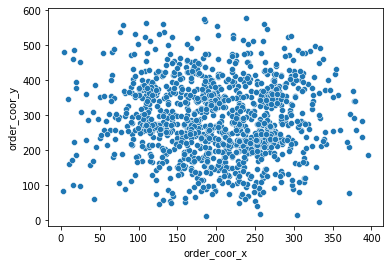

In [15]:
# Distribution of orders
import seaborn as sns
sns.scatterplot(data=order_df, x="order_coor_x", y="order_coor_y")#, hue="time")

<AxesSubplot:xlabel='ware_house_row', ylabel='ware_house_col'>

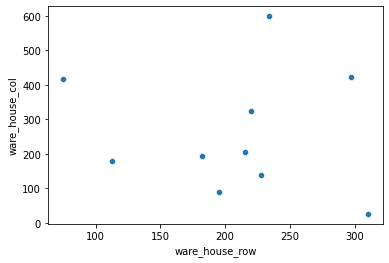

In [16]:
#Distribution of the warehouses
sns.scatterplot(data=warehouse_df, x="ware_house_row", y="ware_house_col")

#####  Let's understand how the orders are distributed around the 
warehouses

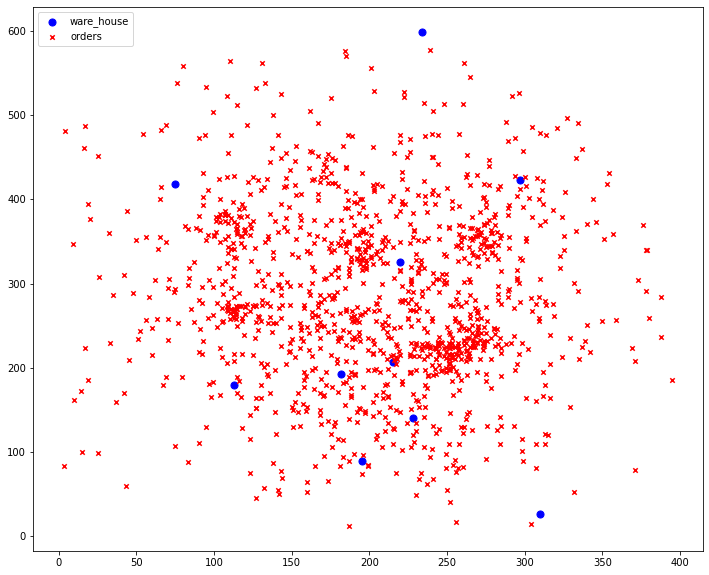

In [17]:
import matplotlib.pyplot as plt

x = range(400)
y = range(400,600)
fig = plt.figure(figsize=(12,10))
ax1 = fig.add_subplot(111)

ax1.scatter(warehouse_df['ware_house_row'], warehouse_df['ware_house_col'], s=50, c='b', marker="o", label='ware_house')
ax1.scatter(order_df['order_coor_x'], order_df['order_coor_y'], s=20, c='r', marker="x", label='orders')
plt.legend(loc='upper left');
plt.show()


C:\Users\DEEPAK KUMAR\.conda\envs\dsp_7\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


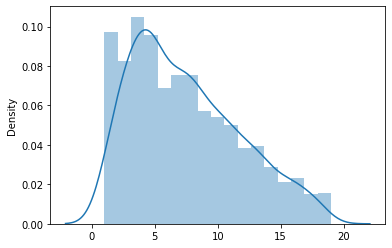

In [18]:
# Frequency of orders
x= [len(x.split()) for x in data_list[27:3775:3]]
x = pd.DataFrame(x, columns=["orders"])
ax = sns.distplot(x)

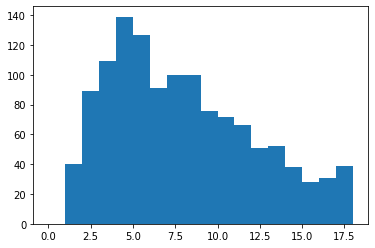

In [19]:
fig,ax = plt.subplots(1,1)

ax.hist(x.orders, [x for x in range(0,19)])

plt.show()

<AxesSubplot:xlabel='orders', ylabel='orders'>

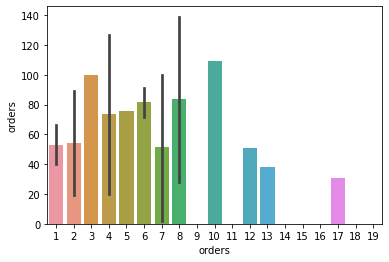

In [20]:
sns.barplot(x="orders", y=x.orders.value_counts(),data=x)